In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

url = 'http://127.0.0.1:8000'

In [2]:
df = pd.read_csv("../data/test_scores.csv")
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [24]:
data = {}
data['resume'] = {
        "school": [2133, "non-null", "object"],
        "school_setting": [2133, "non-null", "object"],
        "school_type": [2133, "non-null", "object"], 
        "classroom": [2133, "non-null", "object"],
        "teaching_method": [2133, "non-null", "object"],
        "n_student": [2133, "non-null", "float64"],
        "student_id": [2133, "non-null", "object"],
        "gender": [2133, "non-null", "object"],
        "lunch": [2133, "non-null", "object"],
        "pretest": [2133, "non-null", "float64"],
        "posttest": [2133, "non-null", "float64"]
        }


In [5]:
df.drop(['school', 'classroom', 'student_id'], axis=1, inplace=True)

In [6]:
df.describe()

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


In [25]:
data['describe'] = df.describe().to_dict()

In [26]:
print(df['school_setting'].value_counts(), end='\n\n')
print(df['school_type'].value_counts(), end='\n\n')
print(df['teaching_method'].value_counts(), end='\n\n')
print(df['lunch'].value_counts(), end='\n\n')
print(df['n_student'].value_counts(), end='\n\n')

data['count'] = {
    'schoolSetting': df['school_setting'].value_counts().to_dict(),
    'schoolType': df['school_type'].value_counts().to_dict(),
    'teachingMethod': df['teaching_method'].value_counts().to_dict(),
    'lunch': df['lunch'].value_counts().to_dict(),
    'nStudent': df['n_student'].value_counts().to_dict()
}

Urban       906
Suburban    717
Rural       510
Name: school_setting, dtype: int64

Public        1582
Non-public     551
Name: school_type, dtype: int64

Standard        1373
Experimental     760
Name: teaching_method, dtype: int64

Does not qualify                    1215
Qualifies for reduced/free lunch     918
Name: lunch, dtype: int64

22.0    264
21.0    231
27.0    189
28.0    168
20.0    160
30.0    150
24.0    144
23.0    138
17.0    136
19.0    133
25.0    125
18.0     72
16.0     64
15.0     45
31.0     31
29.0     29
14.0     28
26.0     26
Name: n_student, dtype: int64



In [8]:
df.corr()

,n_student,pretest,posttest
n_student,1.000000,-0.499253,-0.504886
pretest,-0.499253,1.000000,0.950884
posttest,-0.504886,0.950884,1.000000


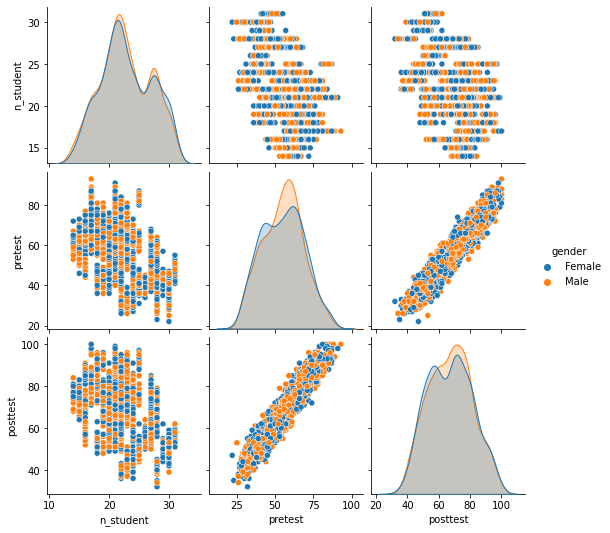

In [9]:
sns.pairplot(df, hue='gender')

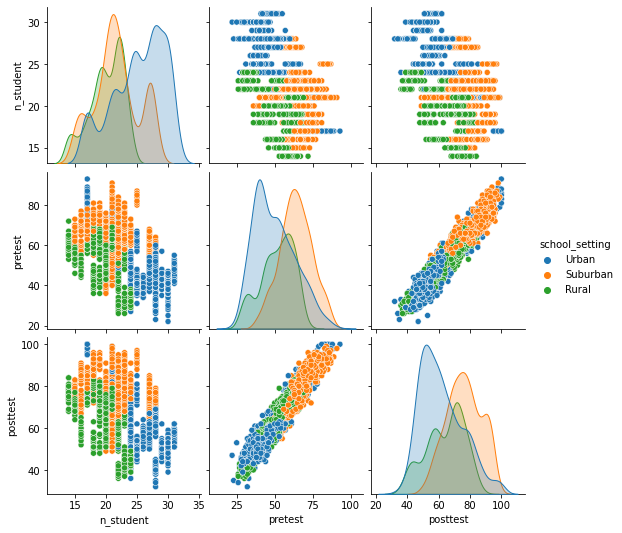

In [10]:
sns.pairplot(df, hue='school_setting')

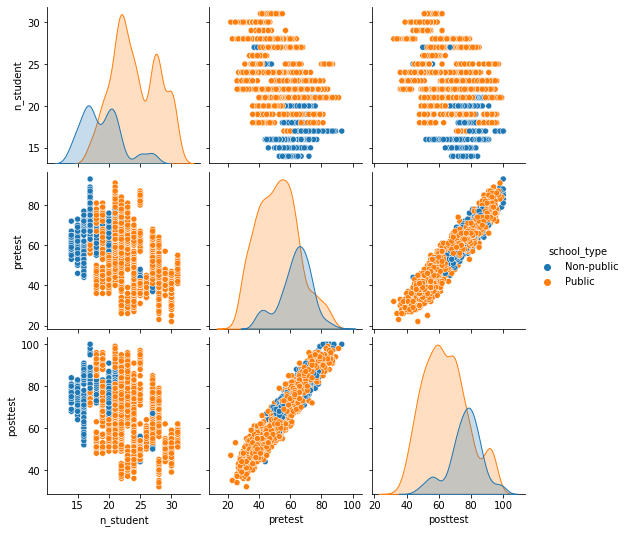

In [11]:
sns.pairplot(df, hue='school_type')

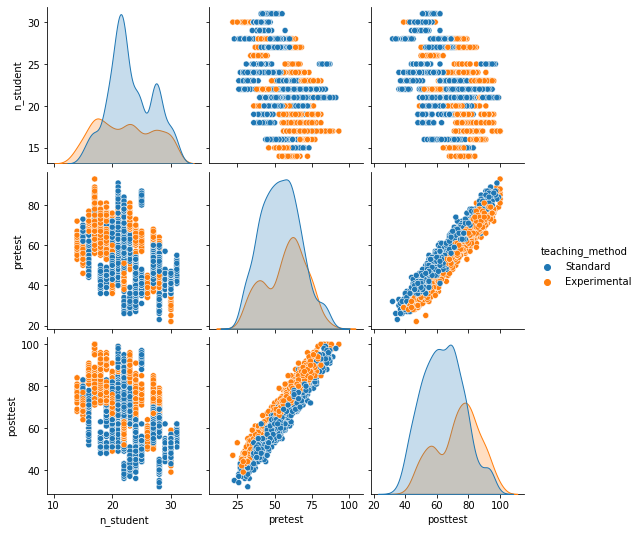

In [12]:
sns.pairplot(df, hue='teaching_method')

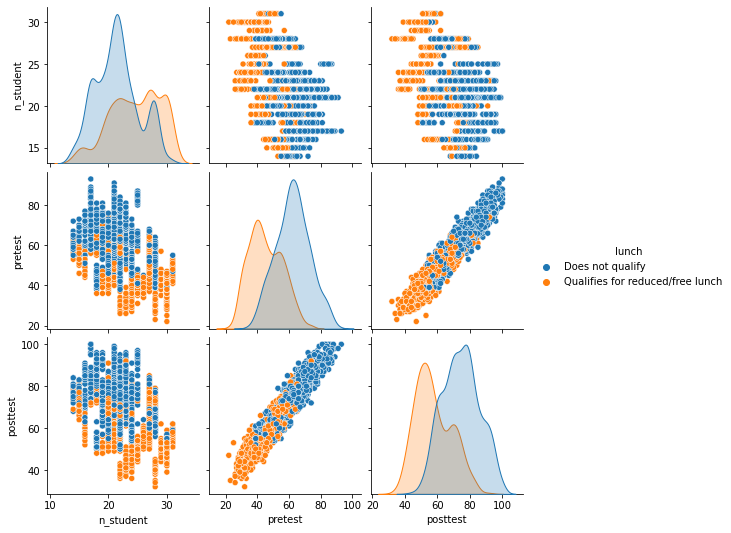

In [13]:
sns.pairplot(df, hue='lunch')

In [14]:
dfGender = df.groupby('gender')

In [15]:
dfGender.sum()

,n_student,pretest,posttest
gender,,,
Female,24160.0,57946.0,70757.0
Male,24465.0,59275.0,72372.0


In [16]:
dfGender.mean()

,n_student,pretest,posttest
gender,,,
Female,22.878788,54.873106,67.004735
Male,22.715877,55.037140,67.197772


In [17]:
df.columns

Index(['school_setting', 'school_type', 'teaching_method', 'n_student',
       'gender', 'lunch', 'pretest', 'posttest'],
      dtype='object')

In [27]:
dfSettingTypeMethodLunch = df.drop('n_student', axis=1).groupby(['school_setting', 'school_type', 'teaching_method', 'lunch']).describe()
dfSettingTypeMethodLunch

pretest  \
                                                                              count   
school_setting school_type teaching_method lunch                                      
Rural          Non-public  Experimental    Does not qualify                    38.0   
                                           Qualifies for reduced/free lunch    43.0   
                           Standard        Does not qualify                     3.0   
                                           Qualifies for reduced/free lunch    13.0   
               Public      Experimental    Does not qualify                    78.0   
                                           Qualifies for reduced/free lunch    42.0   
                           Standard        Does not qualify                   151.0   
                                           Qualifies for reduced/free lunch   142.0   
Suburban       Non-public  Experimental    Does not qualify                    67.0   
                                           Qualifies for reduced/free lunch    35.0   
                           Standard        Does not qualify                    68.0   
                                           Qualifies for reduced/free lunch    23.0   
               Public      Experimental    Does not qualify                   127.0   
                                           Qualifies for reduced/free lunch    55.0   
                           Standard        Does not qualify                   209.0   
                                           Qualifies for reduced/free lunch   133.0   
Urban          Non-public  Experimental    Does not qualify                    59.0   
                                           Qualifies for reduced/free lunch    23.0   
                           Standard        Does not qualify                   158.0   
                                           Qualifies for reduced/free lunch    21.0   
               Public      Experimental    Does not qualify                    73.0   
                                           Qualifies for reduced/free lunch   120.0   
                           Standard        Does not qualify                   184.0   
                                           Qualifies for reduced/free lunch   268.0   

                                                                                        \
                                                                                  mean   
school_setting school_type teaching_method lunch                                         
Rural          Non-public  Experimental    Does not qualify                  63.026316   
                                           Qualifies for reduced/free lunch  55.860465   
                           Standard        Does not qualify                  50.666667   
                                           Qualifies for reduced/free lunch  48.461538   
               Public      Experimental    Does not qualify                  56.833333   
                                           Qualifies for reduced/free lunch  53.285714   
                           Standard        Does not qualify                  55.463576   
                                           Qualifies for reduced/free lunch  39.683099   
Suburban       Non-public  Experimental    Does not qualify                  67.119403   
                                           Qualifies for reduced/free lunch  60.514286   
                           Standard        Does not qualify                  67.235294   
                                           Qualifies for reduced/free lunch  65.695652   
               Public      Experimental    Does not qualify                  69.472441   
                                           Qualifies for reduced/free lunch  55.781818   
                           Standard        Does not qualify                  68.224880   
                                           Qualifies for reduced/free lunch  52.075188   
Urban          N

In [28]:
data['groupby'] = json.loads(dfSettingTypeMethodLunch.to_json())
headers = {
        "accept": "application/json",
        "Content-Type": "application/json" 
}
print(requests.post(url + "/test-scores-of-students/info", data=json.dumps(data), headers=headers).text)

{"message":"Insert datas on test-scores-of-students -> info works!"}


In [23]:
data = {'test': 'test'}
json.dumps(data)['test']

TypeError: string indices must be integers